# Tennis Linear Regression
---

In this notebook we are going to explore data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). We are going to familiarize ourselves with the data, analyse it, and build a model that predicts the outcome for a tennis player based on their playing habits.

The data on-hand is about the top 1500 ranked players in the ATP over the span of 2009 to 2017. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. The different fields in the data set are described in the appendix at the end of this notebook.

#### Importing librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Importing the data from 'tennis_stats.csv' in a Pandas dataframe and displaying the first few lines of the data

In [2]:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


#### Analysing the relationship between different features of the data set and the amount of Winnings
Plotting different features against Winnings to identify patterns. There appears to be a strong positive linear relationship between BreakPointsFaced, BreakPointsOpportunities, ReturnGamesPlayed, ServiceGamesPlayed and wins.

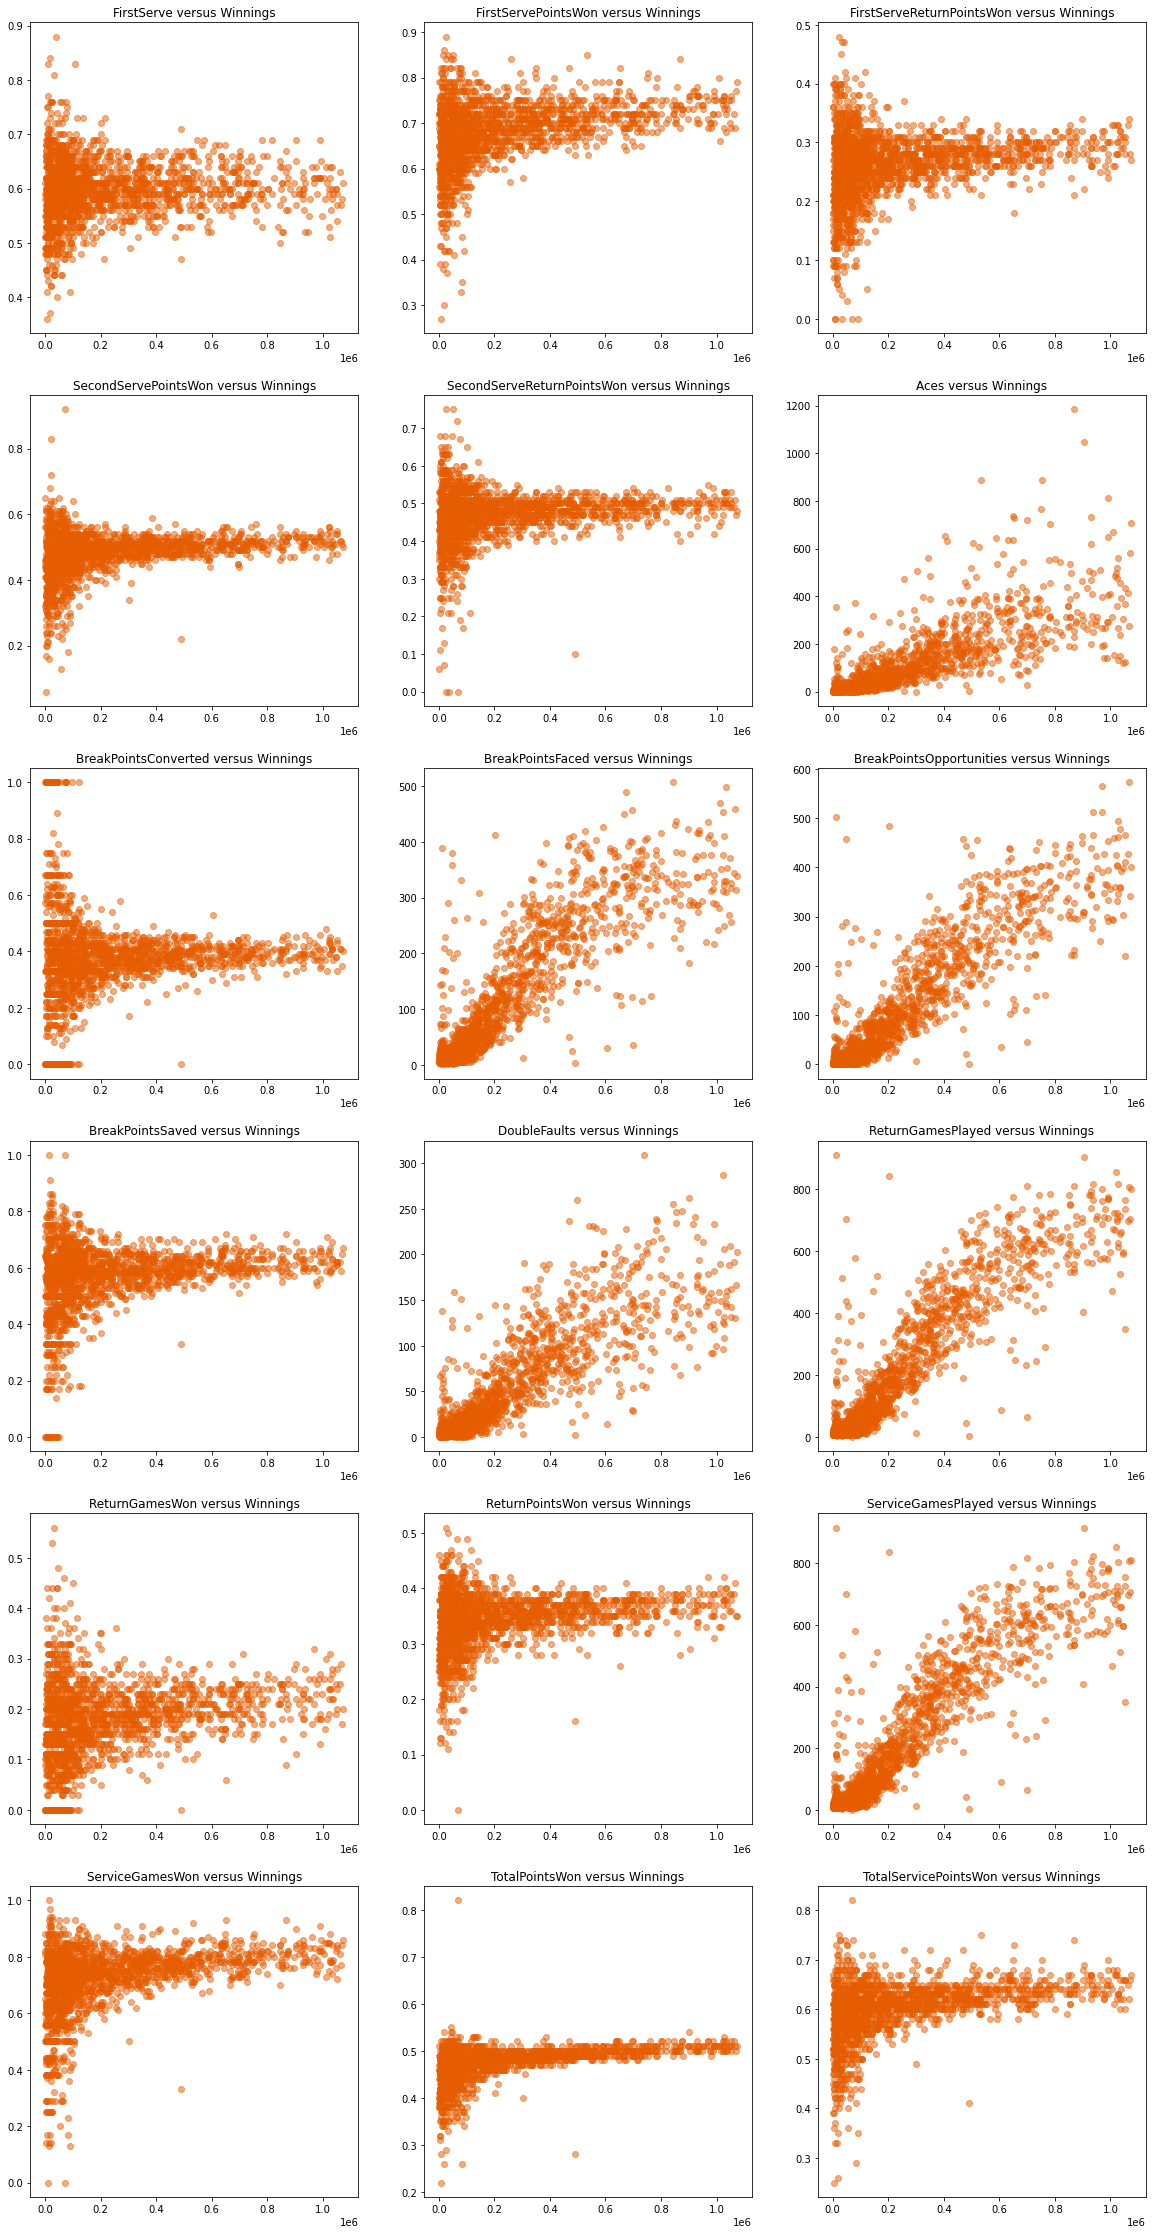

In [3]:
plt.figure(figsize = (20, 40))

features = ['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted','BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon','ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon']

for index in range(len(features)):
    ax = plt.subplot(6, 3, index + 1)
    title = features[index] + " versus Winnings"
    ax.title.set_text(title)
    plt.scatter(df["Winnings"], df[features[index]], alpha = 0.5, color = "#e65c00")

plt.show()


Calculating the Pearson Correlation between Winnings and all other features to identify those that have a string linear relationship with Winnings.

In [4]:
features = ['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted','BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon','ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon']

for index in range(len(features)):
    corr, p = pearsonr(df["Winnings"], df[features[index]])
    if corr > 0.40 or corr< -0.40:
        print(features[index],": " , round(corr , 4))

Aces :  0.7984
BreakPointsFaced :  0.876
BreakPointsOpportunities :  0.9004
DoubleFaults :  0.8547
ReturnGamesPlayed :  0.9126
ServiceGamesPlayed :  0.913
TotalPointsWon :  0.4611
TotalServicePointsWon :  0.4077


#### Building a single feature linear regression model to predict Winnings

Based on the above, we've identified a strong linear relationship between Winnings and each of the following features: BreakPointsOpportunities, ReturnGamesPlayed and ServiceGamesPlayed.

We are going to build and train a single feature linear regression model using the BreakPointsOpportunities feature to predict Winnings and use sklearn‘s LinearRegression `.score()` method that returns the coefficient of determination R² of the prediction to assess the model's accuracy.

In [5]:
x = df[['BreakPointsOpportunities']]
y = df['Winnings']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

singlefeature_lr = LinearRegression()
singlefeature_lr.fit(x_train, y_train)

print("The coefficient of determination R² of the single feature prediction:")
print(" - on the training data: ", singlefeature_lr.score(x_train, y_train))
print(" - on the test data: ", singlefeature_lr.score(x_test, y_test))

The coefficient of determination R² of the single feature prediction:
 - on the training data:  0.8111412774695739
 - on the test data:  0.8081205523550063


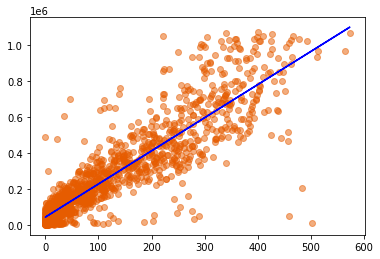

In [6]:
y_predict = singlefeature_lr.predict(x)

plt.scatter(df['BreakPointsOpportunities'], df['Winnings'], alpha = 0.5, color = '#e65c00')
plt.plot(x, y_predict, color = 'Blue')
plt.show()

#### Building a two-feature linear regression model to predict Winnings

Based on the above, we've identified a strong linear relationship between Winnings and each of the following features:
> BreakPointsOpportunities <br>
> ReturnGamesPlayed <br>
> ServiceGamesPlayed <br>

We are going to build and train a linear regression model using the ReturnGamesPlayed and the ServiceGamesPlayed features to predict Winnings.

In [7]:
x = df[['BreakPointsOpportunities', 'ServiceGamesPlayed']]
y = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

two_features_lr = LinearRegression()
two_features_lr.fit(x_train, y_train)

print("The coefficient of determination R² of the two-feature prediction:")
print(" - on the training data: ", two_features_lr.score(x_train, y_train))
print(" - on the test data: ", two_features_lr.score(x_test, y_test))

The coefficient of determination R² of the two-feature prediction:
 - on the training data:  0.8356666278203743
 - on the test data:  0.8303528220567031


#### Building a multiple-feature linear regression model to predict Winnings

Based on the above, we've identified a strong linear relationship (corr > 40) between Winnings and each of the following features: 

> Aces : corr = 0.7984<br>
> BreakPointsFaced : corr = 0.876<br>
> BreakPointsOpportunities : corr = 0.9004<br>
> DoubleFaults : corr = 0.8547<br>
> ReturnGamesPlayed : corr = 0.9126<br>
> ServiceGamesPlayed : corr = 0.913<br>
> TotalPointsWon : corr = 0.4611<br>
> TotalServicePointsWon : corr = 0.4077<br>


In [8]:
x = df[['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed', 'TotalPointsWon', 'TotalServicePointsWon']]
y = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mult_features_lr = LinearRegression()
mult_features_lr.fit(x_train, y_train)


print("The coefficient of determination R² of the multi-feature prediction:")
print(" - on the training data: ", mult_features_lr.score(x_train, y_train))
print(" - on the test data: ", mult_features_lr.score(x_test, y_test))

The coefficient of determination R² of the multi-feature prediction:
 - on the training data:  0.8442889601539872
 - on the test data:  0.8290095725876743


### Conclusion

The above shows that we managed to improve the accuracy of the single feature model on the test dataset by adding a second feature. However, using 8 features in our linear regression model cause the accuracy on the test dataset to decrease due to overfitting the model to the training data.  

---

## Appendix
---

The different fields in the data set are described below:

> *Player*: name of the tennis player<br>
> *Year*: year data was recorded<br>

#### Service Game Columns (Offensive)

> *Aces*: number of serves by the player where the receiver does not touch the ball<br>
> *DoubleFaults*: number of times player missed both first and second serve attempts<br>
> *FirstServe*: % of first-serve attempts made<br>
> *FirstServePointsWon*: % of first-serve attempt points won by the player<br>
> *SecondServePointsWon*: % of second-serve attempt points won by the player<br>
> *BreakPointsFaced*: number of times where the receiver could have won service game of the player<br>
> *BreakPointsSaved*: % of the time the player was able to stop the receiver from winning service game when they had the chance<br>
> *ServiceGamesPlayed*: total number of games where the player served<br>
> *ServiceGamesWon*: total number of games where the player served and won<br>
> *TotalServicePointsWon*: % of points in games where the player served that they won<br>

#### Return Game Columns (Defensive)

> *FirstServeReturnPointsWon*: % of opponents first-serve points the player was able to win<br>
> *SecondServeReturnPointsWon*: % of opponents second-serve points the player was able to win<br>
> *BreakPointsOpportunities*: number of times where the player could have won the service game of the opponent<br>
> *BreakPointsConverted*: % of the time the player was able to win their opponent’s service game when they had the chance<br>
> *ReturnGamesPlayed*: total number of games where the player’s opponent served<br>
> *ReturnGamesWon*: total number of games where the player’s opponent served and the player won<br>
> *ReturnPointsWon*: total number of points where the player’s opponent served and the player won<br>
> *TotalPointsWon*: % of points won by the player<br>

#### Outcomes

> *Wins*: number of matches won in a year<br>
> *Losses*: number of matches lost in a year<br>
> *Winnings*: total winnings in USD($) in a year<br>
> *Ranking*: ranking at the end of year<br>